In [35]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from collections import Counter

In [36]:
%%time 
file = pd.read_csv('soc-redditHyperlinks-title.tsv', delimiter='\t')

Wall time: 5.02 s


In [37]:
def custom_clust(elem):
    return(elem[1])

def custom_func(elem):
    return(elem[1])

In [38]:
%%time
u_source = file['SOURCE_SUBREDDIT'].unique().tolist()
u_target = file['TARGET_SUBREDDIT'].unique().tolist()
u_source.extend(u_target)
Vertices_list = list(dict.fromkeys(u_source))
Vertices_list.sort()
print("No:of Vertices -",len(Vertices_list))

No:of Vertices - 54075
Wall time: 137 ms


In [39]:
%%time
Edges_l = list(zip(file['SOURCE_SUBREDDIT'],file['TARGET_SUBREDDIT']))
Edges_l.sort()
Edges_list = list(dict.fromkeys(Edges_l))
print("No:of Unique Edges -",len(Edges_list))

No:of Unique Edges - 234792
Wall time: 1.15 s


In [40]:
%%time
V = len(Vertices_list)

Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list = []
for s in range(V):
    Adj_list.append([])

for i in Edges_list:
    a = Vertices_list.index(i[0])
    b = Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])

Wall time: 5min 40s


In [41]:
count_vertex = 0    
count = []
outdegree_sub = {}
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)
    outdegree_sub[Vertices_list[i]] = Adj_list[i]

In [42]:
count = []
for i in range(len(Adj_Mat)):
    count_vertex = Adj_Mat[i].sum()
#     print(count_vertex)
    a = [Vertices_list[i],count_vertex]
    count.append(a)

In [43]:
count.sort(key=custom_func,reverse=True)
count
count1 = count[:20]
popularName = [x[0] for x in count1]
popularNo = [x[1] for x in count1]
y_pos = np.arange(len(popularName))

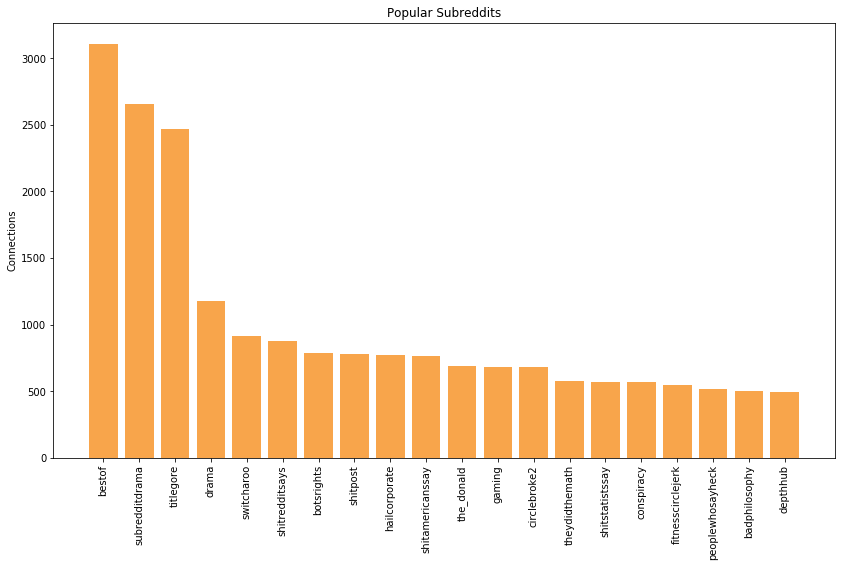

In [44]:

plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, popularNo, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName,rotation='vertical')
plt.ylabel('Connections')
plt.title('Popular Subreddits')
plt.show()

In [45]:
popularName1 = []
commonCount = []
commonName = []
for s in popularName:
    common_sub = list(set(outdegree_sub[s]) & set(popularName))
    popularName1.append(s)
    commonCount.append(len(common_sub))
    commonName.append((common_sub))

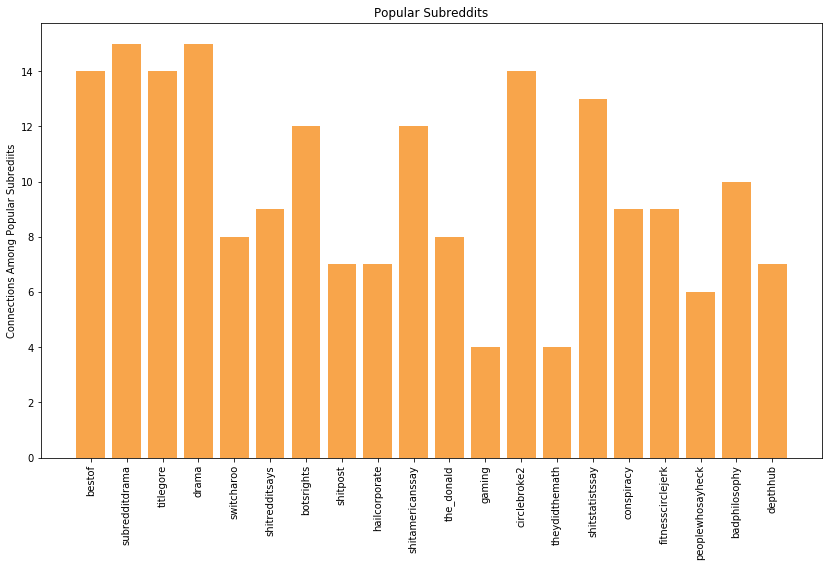

In [51]:

y_pos = np.arange(len(popularName1))
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, commonCount, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName1,rotation='vertical')
plt.ylabel('Connections Among Popular Subrediits')
plt.title('Popular Subreddits')
plt.show()

In [52]:
d3matrix = []
d3matrix = np.zeros((len(popularName1),len(popularName1)),dtype=int)
matrix_index = 0
for name in commonName:
    for name1 in name:
        a = popularName1.index(name1)
        d3matrix[matrix_index][a] = 1
#         print(a)
    matrix_index = matrix_index+1

In [53]:

d3matrix

array([[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1,

In [54]:

%%time

# wall time using adjacency matrix

count = []
for i in range(len(Adj_Mat)):
    count_vertex = Adj_Mat[i].sum()
#     print(count_vertex)
    a = [Vertices_list[i],count_vertex]
    count.append(a)

Wall time: 34.5 s


In [55]:
x = []
y = []
for i in range(20):
    x.append(count[i][0])
    y.append(count[i][1])    


In [56]:
origin_nodes = list(set(u_source).difference(u_target))
dest_nodes   = list(set(u_target).difference(u_source))
origin_nodes.sort()
dest_nodes.sort()
print(" no:of source nodes :",len(origin_nodes))
print(" no:of target nodes :",len(dest_nodes))

 no:of source nodes : 27187
 no:of target nodes : 0


In [57]:
def Vertices(node):
    for i in range(len(Vertices_list)):
        if node == Vertices_list[i]:
#             print(i)
            return i

def Matrix(index):
    for i in range(len(Adj_Mat[index])):
        if Adj_Mat[index][i]==1:
#             print(Vertices_list[i])
            return Vertices_list[i]

In [58]:

link_sent_popular_nodes = []
for i in range(len(x)):
    df = file[file['SOURCE_SUBREDDIT']==x[i]]
    link_sent_popular_nodes.append(df.LINK_SENTIMENT.tolist())

In [21]:
count_link_sent = []
pos = []
neg = []
for i in range(len(link_sent_popular_nodes)):
    link_sent_popular_nodes[i].sort()
    c = Counter(link_sent_popular_nodes[i])
    count_link_sent.append(list(c.values()))
    pos.append(list(c.values())[1])
    neg.append(list(c.values())[0])

IndexError: list index out of range

ValueError: shape mismatch: objects cannot be broadcast to a single shape

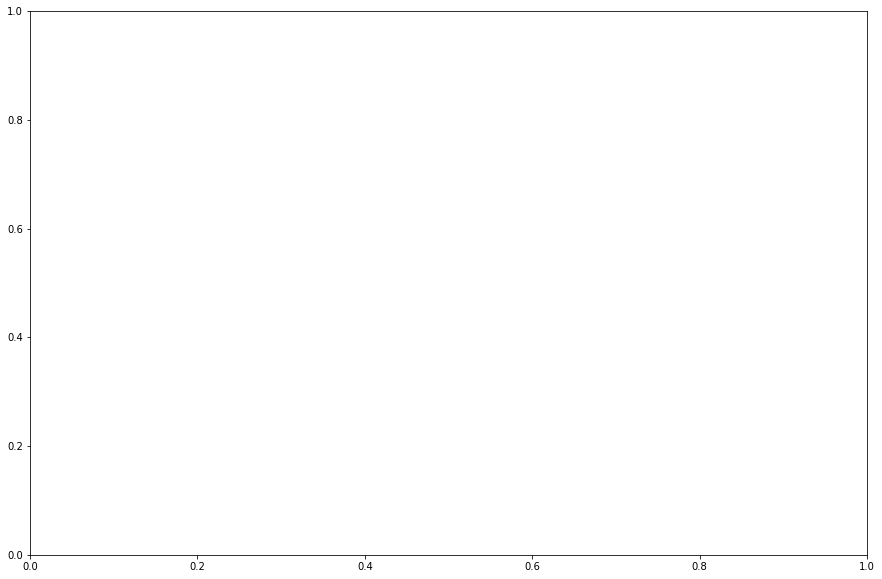

In [59]:
width = 0.75
s1 = np.arange(20)

plt.figure(figsize=(15,10))

p1 = plt.barh(s1,pos, width)
p2 = plt.barh(s1,neg, width)

plt.ylabel('top 20 popular sub-reddits')
plt.xlabel('total #edges from the node')
plt.title('Number of Positive and Negative link Sentiments on the outward edges of top 20 popular subreddits')

plt.yticks(s1, x)
plt.xticks(np.arange(0, 18001, 1000))
plt.legend((p1[0], p2[0]), ('positive', 'negative'))

plt.show()

In [ ]:
link_sent_popular_nodes_1 = []
for i in range(len(x1)):
    df1 = file[file['TARGET_SUBREDDIT']==x1[i]]
    link_sent_popular_nodes_1.append(df1.LINK_SENTIMENT.tolist())

In [ ]:

count_link_sent_1 = []
pos_1 = []
neg_1 = []
for i in range(len(link_sent_popular_nodes_1)):
    link_sent_popular_nodes_1[i].sort()
    c = Counter(link_sent_popular_nodes_1[i])
    count_link_sent_1.append(list(c.values()))
    pos_1.append(list(c.values())[1])
    neg_1.append(list(c.values())[0])

In [ ]:
s1_1 = np.arange(20)

plt.figure(figsize=(15,10))

p1_1 = plt.barh(s1_1,pos_1, width)
p2_1 = plt.barh(s1_1,neg_1, width)

plt.ylabel('top 20 popular sub-reddits')
plt.xlabel('total #edges from the node')
plt.title('Number of Positive and Negative link Sentiments on the outward edges of top 20 popular subreddits')

plt.yticks(s1_1, x1)
plt.xticks(np.arange(0, 17001, 1000))
plt.legend((p1_1[0], p2_1[0]), ('positive', 'negative'))

plt.show()

In [ ]:
%%time
body  = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')
title = pd.read_csv('soc-redditHyperlinks-title.tsv', delimiter='\t')

body_src_list  = body['SOURCE_SUBREDDIT'].unique().tolist()
body_trg_list  = body['TARGET_SUBREDDIT'].unique().tolist()

body_src_list.extend(body_trg_list)
body_list = list(dict.fromkeys(body_src_list))

title_src_list = title['SOURCE_SUBREDDIT'].unique().tolist()
title_trg_list = title['TARGET_SUBREDDIT'].unique().tolist()

title_src_list.extend(title_trg_list)
title_list = list(dict.fromkeys(title_src_list))

only_body  = list(set(body_list).difference(title_list))
only_title = list(set(title_list).difference(body_list))

all_V = 55863

print("#Nodes which can be visited only through body of the subreddit  :", len(only_body))
print("#Nodes which can be visited only through title of the subreddit :", len(only_title))
cnt =  (all_V) - (len(only_body)+len(only_title))
print("#Nodes which can be visited by body and title :", cnt)

In [ ]:

# First way to call the 2 group Venn diagram:
venn2(subsets = (len(only_body), len(only_title), cnt), set_labels = ('Body', 'Title'))
ax = plt.gca()
ax.legend(labels=['ONLY_BODY','ONLY_TITLE','BOTH'], title="")
plt.title("#nodes that can be visited by only body/only title")
plt.show()

In [60]:
path_length = []
for node in origin_nodes:
    src = node
    path = []
    trg = ''
    path.append(src)
    exists=True

    while exists:
        index = Vertices_list.index(src)
        if len(Adj_list[index])>0:
            trg   = Adj_list[index][0]  
            for element in path:
                if element == trg:                    
#                     check for next adjacent node
                    trg = Adj_list[index][0]  
                    exists = False
                
            if exists:
                path.append(trg)
                src = trg
        else:
            exists=False
    path_length.append(len(path))

In [61]:
avg = 0
sum = 0
for i in range(len(path_length)):
    sum += path_length[i]
avg = int(sum/(i+1))
print("average path length of a path until a cycle is encountered :", avg)

average path length of a path until a cycle is encountered : 4
